In [1]:
import os
import numpy as np
import scipy.io as scio

import matplotlib.pyplot as plt
%matplotlib inline

import importlib

In [2]:
import utils

In [8]:
importlib.reload(utils.display)

<module 'utils.display' from 'e:\\Projects\\LiveGestureUseDepthCamera\\utils\\display.py'>

In [4]:
sample_correct = np.load("./data/sample.npy")
sample_error = np.load("./data/errsample.npy")

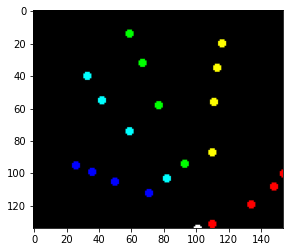

In [9]:
img_correct = utils.display.drawResult(sample_correct)
plt.imshow(img_correct)

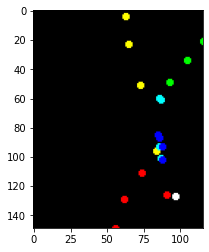

In [56]:
img_error = utils.display.drawResult(sample_error)
plt.imshow(img_error)

In [59]:
FINGER_THUMB  = [0,1,2,3,4]
FINGER_INDEX  = [0,5,6,7,8]
FINGER_MIDDLE = [0,9,10,11,12]
FINGER_RING   = [0,13,14,15,16]
FINGER_PINKY  = [0,17,18,19,20]
FINGERS = np.array([FINGER_THUMB,FINGER_INDEX, FINGER_MIDDLE, FINGER_RING,FINGER_PINKY ])

def getCoord(a,b,c):
    ab = b-a
    ac = c-a
    yd = np.cross(ab,ac)
    y = yd/np.linalg.norm(yd)
    x = ab/np.linalg.norm(ab)
    zd = np.cross(x,y)
    z = zd/np.linalg.norm(zd)
    return np.array([x,y,z])
def getHandCoord(landmark):
    a = landmark[0]
    b = landmark[5]
    c = landmark[17]
    return getCoord(a,b,c)
def get3DAngle(a,b):
    return (np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b)))
def get3DCosAngle(a:np.ndarray,b:np.ndarray):
    angle = np.arccos(get3DAngle(a,b))
    return float(np.rad2deg(angle))

def getFlexionExtensionAngleList(landmark):
    angle_list = [None]*5
    for i in range(5):
        finger = FINGERS[i]
        vecList = landmark[finger[1:]]-landmark[finger[:4]]
        flexion_and_extension_angles = [
            get3DCosAngle(vecList[0],vecList[1]),#∠MCPfe
            get3DCosAngle(vecList[1],vecList[2]),#∠PIPfe
            get3DCosAngle(vecList[2],vecList[3]),#∠DIPfe
        ]
        angle_list[i] = flexion_and_extension_angles
    return angle_list
def getAbductionAdductionAngleList(landmark):
    angle_list = [None]*4
    for i in range(4):
        finger1 = FINGERS[i]
        finger2 = FINGERS[i+1]
        vec1 = landmark[finger1[1]]-landmark[0]
        vec2 = landmark[finger2[1]]-landmark[0]
        angle_list[i] = get3DCosAngle(vec1,vec2)
    # angle_list[5] = 
    return angle_list

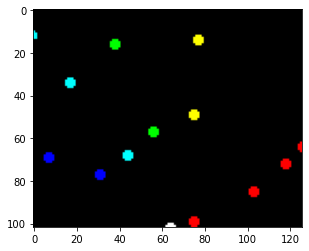

In [67]:
sample_center=(sample_correct-(88,88,0))/(88,88,150)
img_correct = utils.display.drawResult((sample_center+0.5)*100)
plt.imshow(img_correct)

In [60]:
coord = getHandCoord(sample_correct-(88,88,0))

In [54]:
getAbductionAdductionAngleList(sample_error)

[56.26778667328502, 12.131601813222378, 10.833922681364676, 15.487205976058034]

In [55]:
getFlexionExtensionAngleList(sample_error)

[[40.15681829628859, 69.8441337542581, 12.816996948071168],
 [35.58409633165486, 6.926220491809071, 6.748849191342782],
 [27.69774967573711, 30.13238434853596, 19.389501035417485],
 [19.311700189190663, 81.23164966195147, 91.53482721613977],
 [10.76378359019352, 106.71636443216664, 30.598481344079815]]

In [ ]:
# https://doi.org/10.3389/frvir.2021.663618

# AA =  abduction_and_adduction 外展内缩
# FE = flexion_and_extension 屈伸 
Thumb_CMC_AA = [45 ,0]
Thumb_MCP_AA = [12,-7]

Thumb_CMC_FE = [45,-20]
Thumb_MCP_FE = [80 ,0]
Thumb_IP_FE  = [90,-30]

MCP_AA       = [15,-15]

MCP_FE       = [90,-40]
PIP_FE       = [130,0]
DIP_FE       = [90,-30]
